In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import re
pd.set_option('display.max_rows', 100) 



In [3]:
df = pd.read_excel("HealthDataSet.xlsx", header=None)


In [4]:
df.head(100)

,0,1,2,3,4,5,6
0,9bbi18050004,2018-08-04,7.566667,coffee,b,coffee,88
1,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,f,hamburger,48
2,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,f,fry,48
3,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,w,water,48
4,9bbi18050005,2018-09-04,9.683333,handful of trail mix,f,trail mix,119
5,9bbi18050005,2018-09-04,9.683333,handful of trail mix,modifier,handful,119
6,9bbi18050005,2018-08-16,8.250000,2 eggs 1 toast,f,egg toast,100
7,9bbi18050005,2018-08-03,17.566667,soda,b,soda,87
8,9bbi18050005,2018-06-20,11.000000,1 pint beer,b,beer,43
9,9bbi18050005,2018-05-18,18.383333,cheeseburger fries baked brand,f,cheeseburger,10


In [5]:
df_new = df[df[0]=="9bbi18050005"]

In [6]:
df_new.head(10)


,0,1,2,3,4,5,6
1,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,f,hamburger,48
2,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,f,fry,48
3,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,w,water,48
4,9bbi18050005,2018-09-04,9.683333,handful of trail mix,f,trail mix,119
5,9bbi18050005,2018-09-04,9.683333,handful of trail mix,modifier,handful,119
6,9bbi18050005,2018-08-16,8.250000,2 eggs 1 toast,f,egg toast,100
7,9bbi18050005,2018-08-03,17.566667,soda,b,soda,87
8,9bbi18050005,2018-06-20,11.000000,1 pint beer,b,beer,43
9,9bbi18050005,2018-05-18,18.383333,cheeseburger fries baked brand,f,cheeseburger,10
10,9bbi18050005,2018-05-18,18.383333,cheeseburger fries baked brand,f,fry,10


In [7]:
df_food = pd.DataFrame(df_new[3].value_counts())
df_food.head(100)


,3
cup of coffee w creamer,66
1 pint beer,9
zero vitamin water,9
tequila grapefruit cocktail,9
quarter subway sandwich && handful chips quarter sub sandwich,8
cup coffee w creamer,7
shrimp sausage tacos && avocado salsa beans rice,6
hash brown chorizo taco,6
mini lox bagel 2 slices watermelon,6
breakfast burrito glass milk,6


In [93]:
# df_food = pd.DataFrame(df_new[3].str.split().str.len())
# df_food.head(100)


In [8]:
df_food = pd.DataFrame(df_new[3].str.count("hamburger"))
df_food.head(1000)



,3
1,1
2,1
3,1
4,0
5,0
...,...
996,0
997,0
998,0
999,0


In [9]:
df1 = df_new[df_new[3].str.contains(" w | n | and| with | &&")] 
df1.head(100)

,0,1,2,3,4,5,6
1,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,f,hamburger,48
2,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,f,fry,48
3,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,w,water,48
16,9bbi18050005,2018-07-10,12.066667,onion and corn saute,f,onion,63
17,9bbi18050005,2018-07-10,12.066667,onion and corn saute,f,corn,63
23,9bbi18050005,2018-08-30,8.066667,cup of coffee w creamer,b,coffee creamer,114
24,9bbi18050005,2018-05-23,8.683333,cup of coffee w creamer,b,coffee creamer,15
45,9bbi18050005,2018-09-02,7.750000,cup of coffee w creamer,b,coffee creamer,117
47,9bbi18050005,2018-05-30,8.333333,half bagel w cream cheese,f,bagel cream cheese,22
54,9bbi18050005,2018-08-27,13.500000,meatloaf w mashed potatoes,f,mashed potato,111


In [10]:
order_dict ={}
for order in df1[3]:
    item_list = re.split(r" w | n| and| with | &&", order) 
  # if len(item_list)==3:
  #   print(item_list)
    for item in item_list:
        if item not in order_dict.keys():
            order_dict[item] ={}
            for item2 in item_list:
                if item2 != item:
                    if item2 in order_dict[item]:
                        order_dict[item][item2] += 1
                    else: 
                        order_dict[item][item2] = 1
order_dict
        
    



{'hamburger': {'fries water': 1},
 'fries water': {'hamburger': 1},
 ' onion': {' corn saute': 1},
 ' corn saute': {' onion': 1},
 'cup of coffee': {'creamer': 1},
 'creamer': {'cup of coffee': 1},
 'half bagel': {'cream cheese': 1},
 'cream cheese': {'half bagel': 1},
 'meatloaf': {'mashed potatoes': 1},
 'mashed potatoes': {'meatloaf': 1},
 'mixed garden salad': {'grilled': 1},
 'grilled': {'mixed garden salad': 1},
 ' chicken blk ': {' pinto beans': 1},
 ' pinto beans': {' chicken blk ': 1},
 ' celery': {'pnut butter chips': 1},
 'pnut butter chips': {' celery': 1},
 ' spanish rice': {' beans guacamole': 1},
 ' beans guacamole': {' spanish rice': 1},
 ' dirty rice': {'kidney beans': 1},
 'kidney beans': {' dirty rice': 1},
 'beef ribs coleslaw': {' bbq beans': 1},
 ' bbq beans': {'beef ribs coleslaw': 1},
 'cup coffee': {'creamer': 1},
 'grilled chicken': {' veggie era': 1},
 ' veggie era': {'grilled chicken': 1},
 'bowl of fruit': {'lemon chile': 1},
 'lemon chile': {'bowl of fruit

In [11]:
df_relationfrequrncy = df1[3].value_counts()
df_relationfrequrncy.head(100)

cup of coffee w creamer                                          66
quarter subway sandwich && handful chips quarter sub sandwich     8
cup coffee w creamer                                              7
shrimp sausage tacos && avocado salsa beans rice                  6
beef ribs coleslaw n bbq beans                                    5
pot roast rice veggies && watermelon water                        5
2 yellow tail fish tacos && cilantro lime rice                    5
heart of palm salad && thai shrimp w coconut pineapple            5
tomato avocado cucumber salad && grilled chicken breast           4
2 eggs 3 sausage links && 2 tomato slices half avocado            4
ham sandwich  w chips                                             4
beef penne pasta w asparagus                                      4
chicken rice vegetable soup && watermelon drink                   4
cup of coffee w creamer && 2 eggs blk beans 1 tortilla            4
veggies hummus && crab ceviche                  

In [15]:
df2=df1[3].str.split(r" w | n | and| with | &&", n = -1, expand = True).iloc[:-2] 
df2.head(5)

,0,1,2
1,hamburger,fries water,None
2,hamburger,fries water,None
3,hamburger,fries water,None
16,onion,corn saute,None
17,onion,corn saute,None


In [67]:
lengthclm1 = len(df2[0])
print(lengthclm1)

318


In [68]:
lengthclm2 = len(df2[1])
print(lengthclm2)

318


In [61]:
df2[0].value_counts()



cup of coffee                    70
quarter subway sandwich           8
cup coffee                        7
shrimp sausage tacos              6
hamburger                         5
pot roast rice veggies            5
2 yellow tail fish tacos          5
heart of palm salad               5
beef ribs coleslaw                5
chicken rice vegetable soup       4
beef penne pasta                  4
2 eggs 3 sausage links            4
2 egg                             4
pineapple melon wedges grapes     4
meatloaf                          4
apple walnut salad                4
2 grilled beef fajita             4
ham sandwich                      4
tomato avocado cucumber salad     4
veggies hummus                    4
 celery                           3
2 bean                            3
 roasted broccoli                 3
3 pancakes                        3
bowl of fruit                     3
 thin steak                       3
grilled shrimp burrito            3
 cup of coffee              

In [47]:
df2[1].value_counts()

creamer                                81
chips                                  11
 handful chips quarter sub sandwich     8
 avocado salsa beans rice               6
salsa                                   6
 watermelon water                       5
 thai shrimp                            5
 cilantro lime rice                     5
bbq beans                               5
steak                                   4
 chips                                  4
 grilled chicken breast                 4
 2nd cup coffees                        4
rice                                    4
asparagus                               4
 2 tomato slices half avocado           4
 cup clam chowder                       4
 crab ceviche                           4
 veggie                                 4
 watermelon drink                       4
1 egg fruit                             3
water                                   3
 beans                                  3
pnut butter chips                 

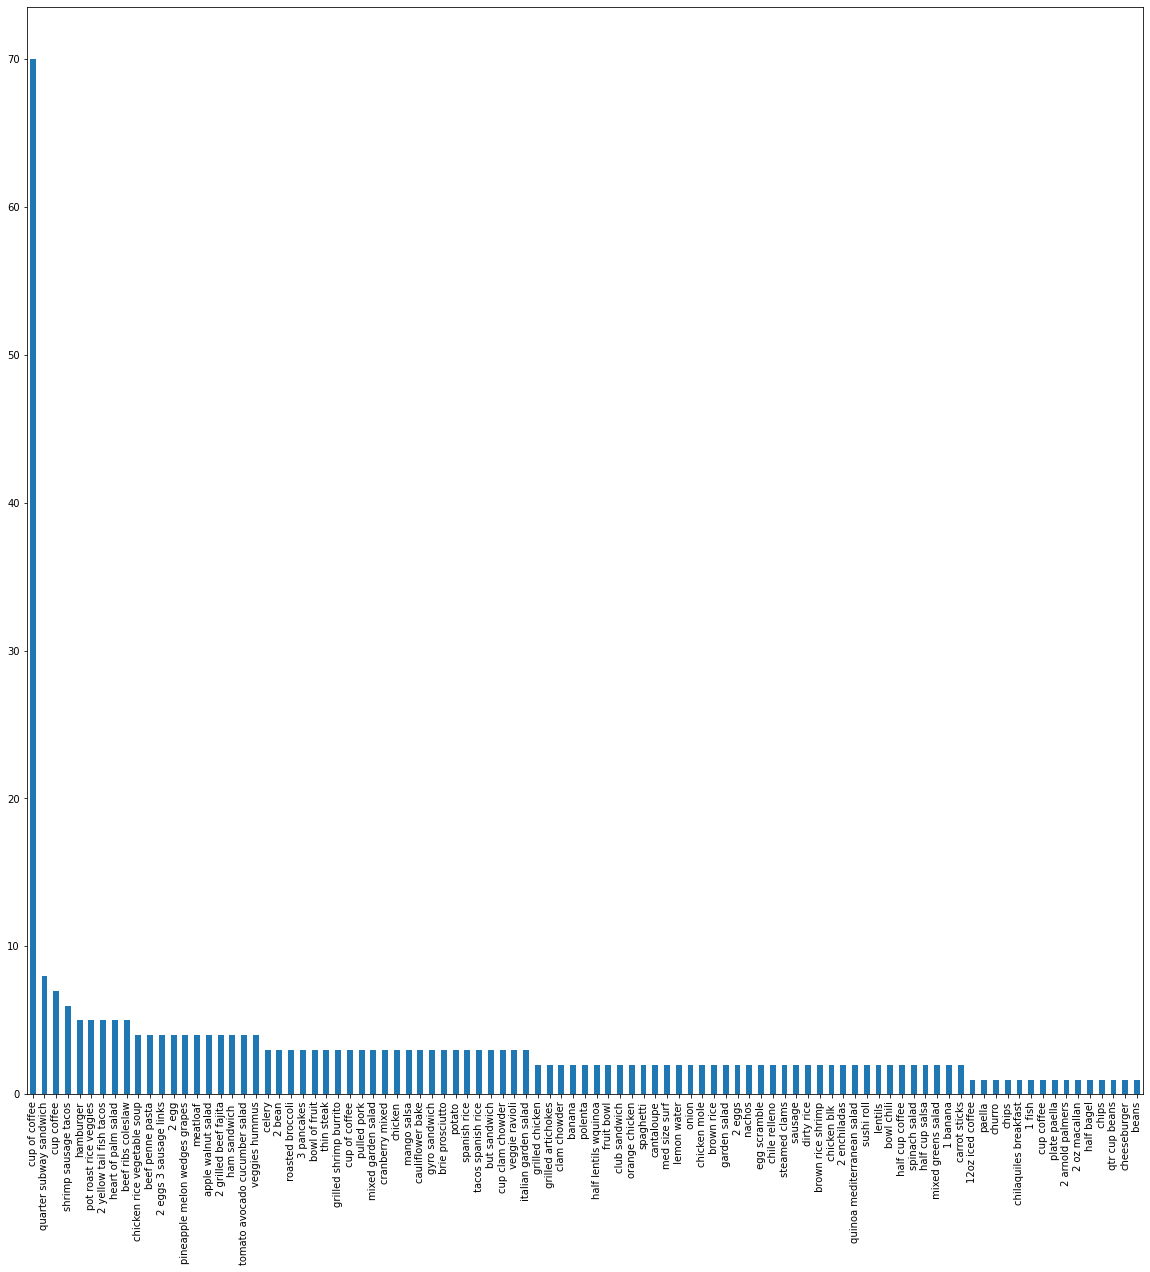

In [57]:
plt.figure(figsize=(20,20))
df2[0].value_counts().plot(kind="bar")
plt.show()

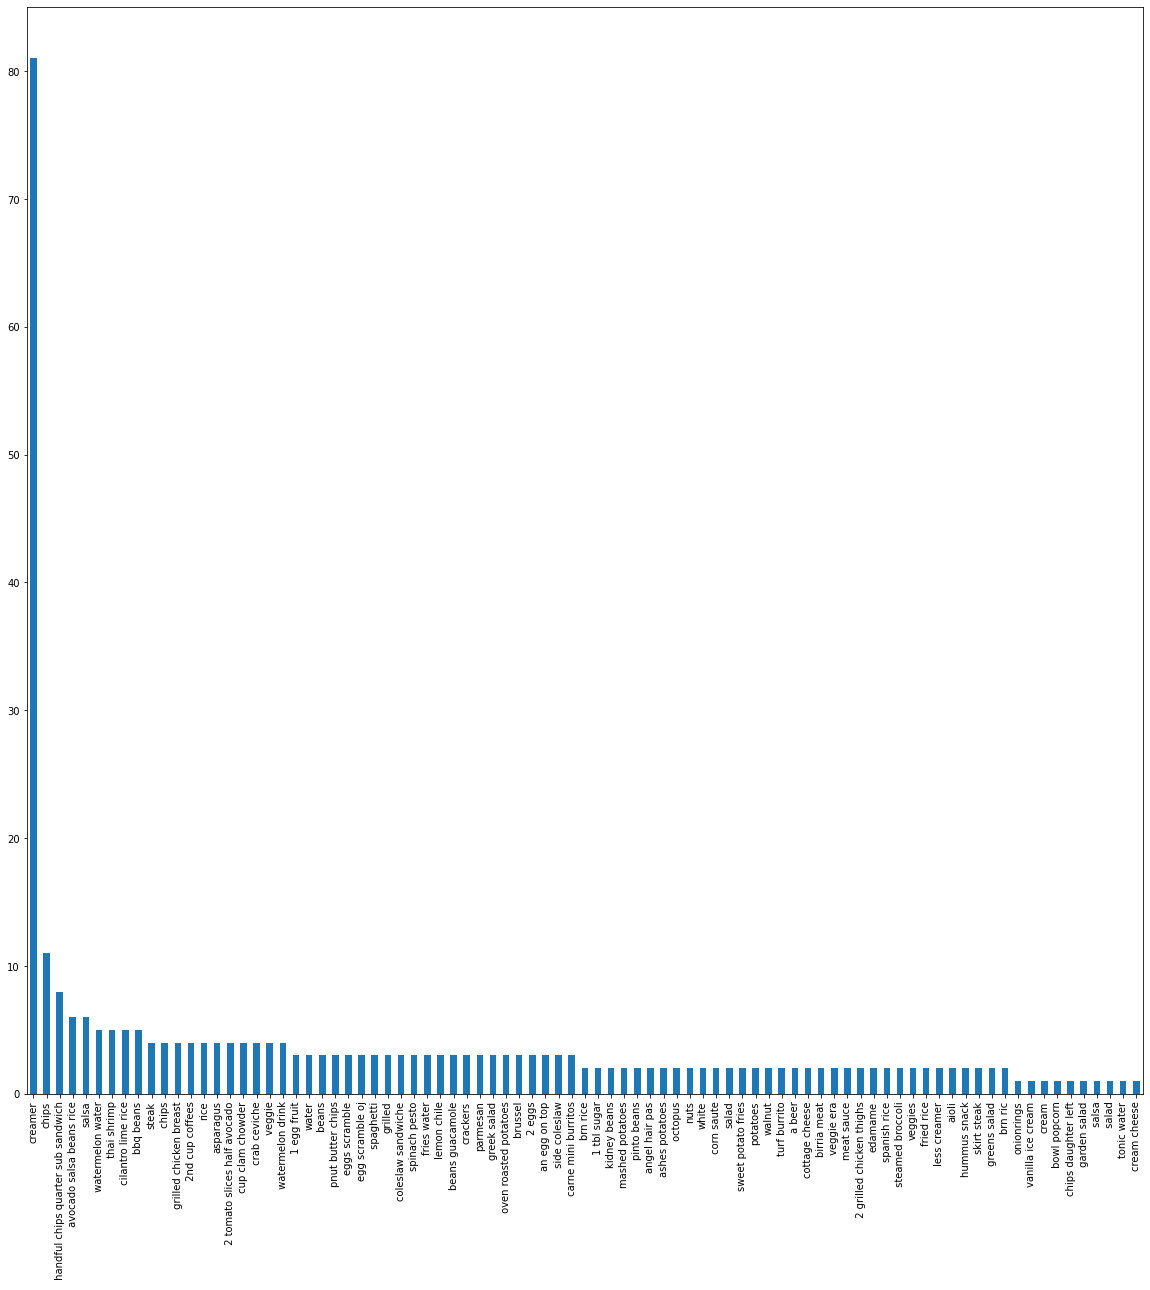

In [54]:
plt.figure(figsize=(20,20))
df2[1].value_counts().plot(kind="bar")
plt.show()